# **🏡 Housing Market 📈Analysis📊: Sales Price Prediction using Feature Engineering, RFs, and Gradient Boosting**

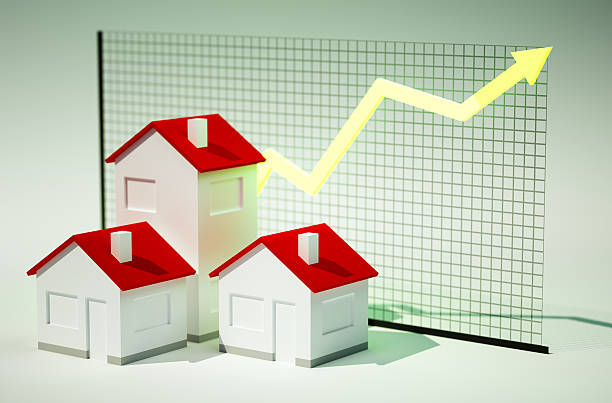


In order to anticipate the sales price of homes, a predictive model is created in this notebook after analysis of housing price data. This problem is a regression problem since its objective is to forecast numerical values. Such a situation falls under the category of a regression issue since the objective is to forecast numerical values. The dataset utilized in this analysis is sourced from the [Kaggle House Prices Competition](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).


When potential buyers inquire about their ideal home, they typically do not prioritize details such as the basement ceiling height or the nearby east-west railroad. However, an extensive dataset shows that many factors beyond the obvious ones, such as the number of bedrooms or the presence of a white-picket fence, can significantly impact price negotiations. This dataset, which encompasses 79 explanatory variables that cover nearly every aspect of residential properties in Ames, Iowa, can be used to predict the final selling price of each home.

## **What our task entails**


([Reference Link](https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-1-getting-ready-for-machine-learning/a-6-step-framework-for-approaching-machine-learning-projects.md))

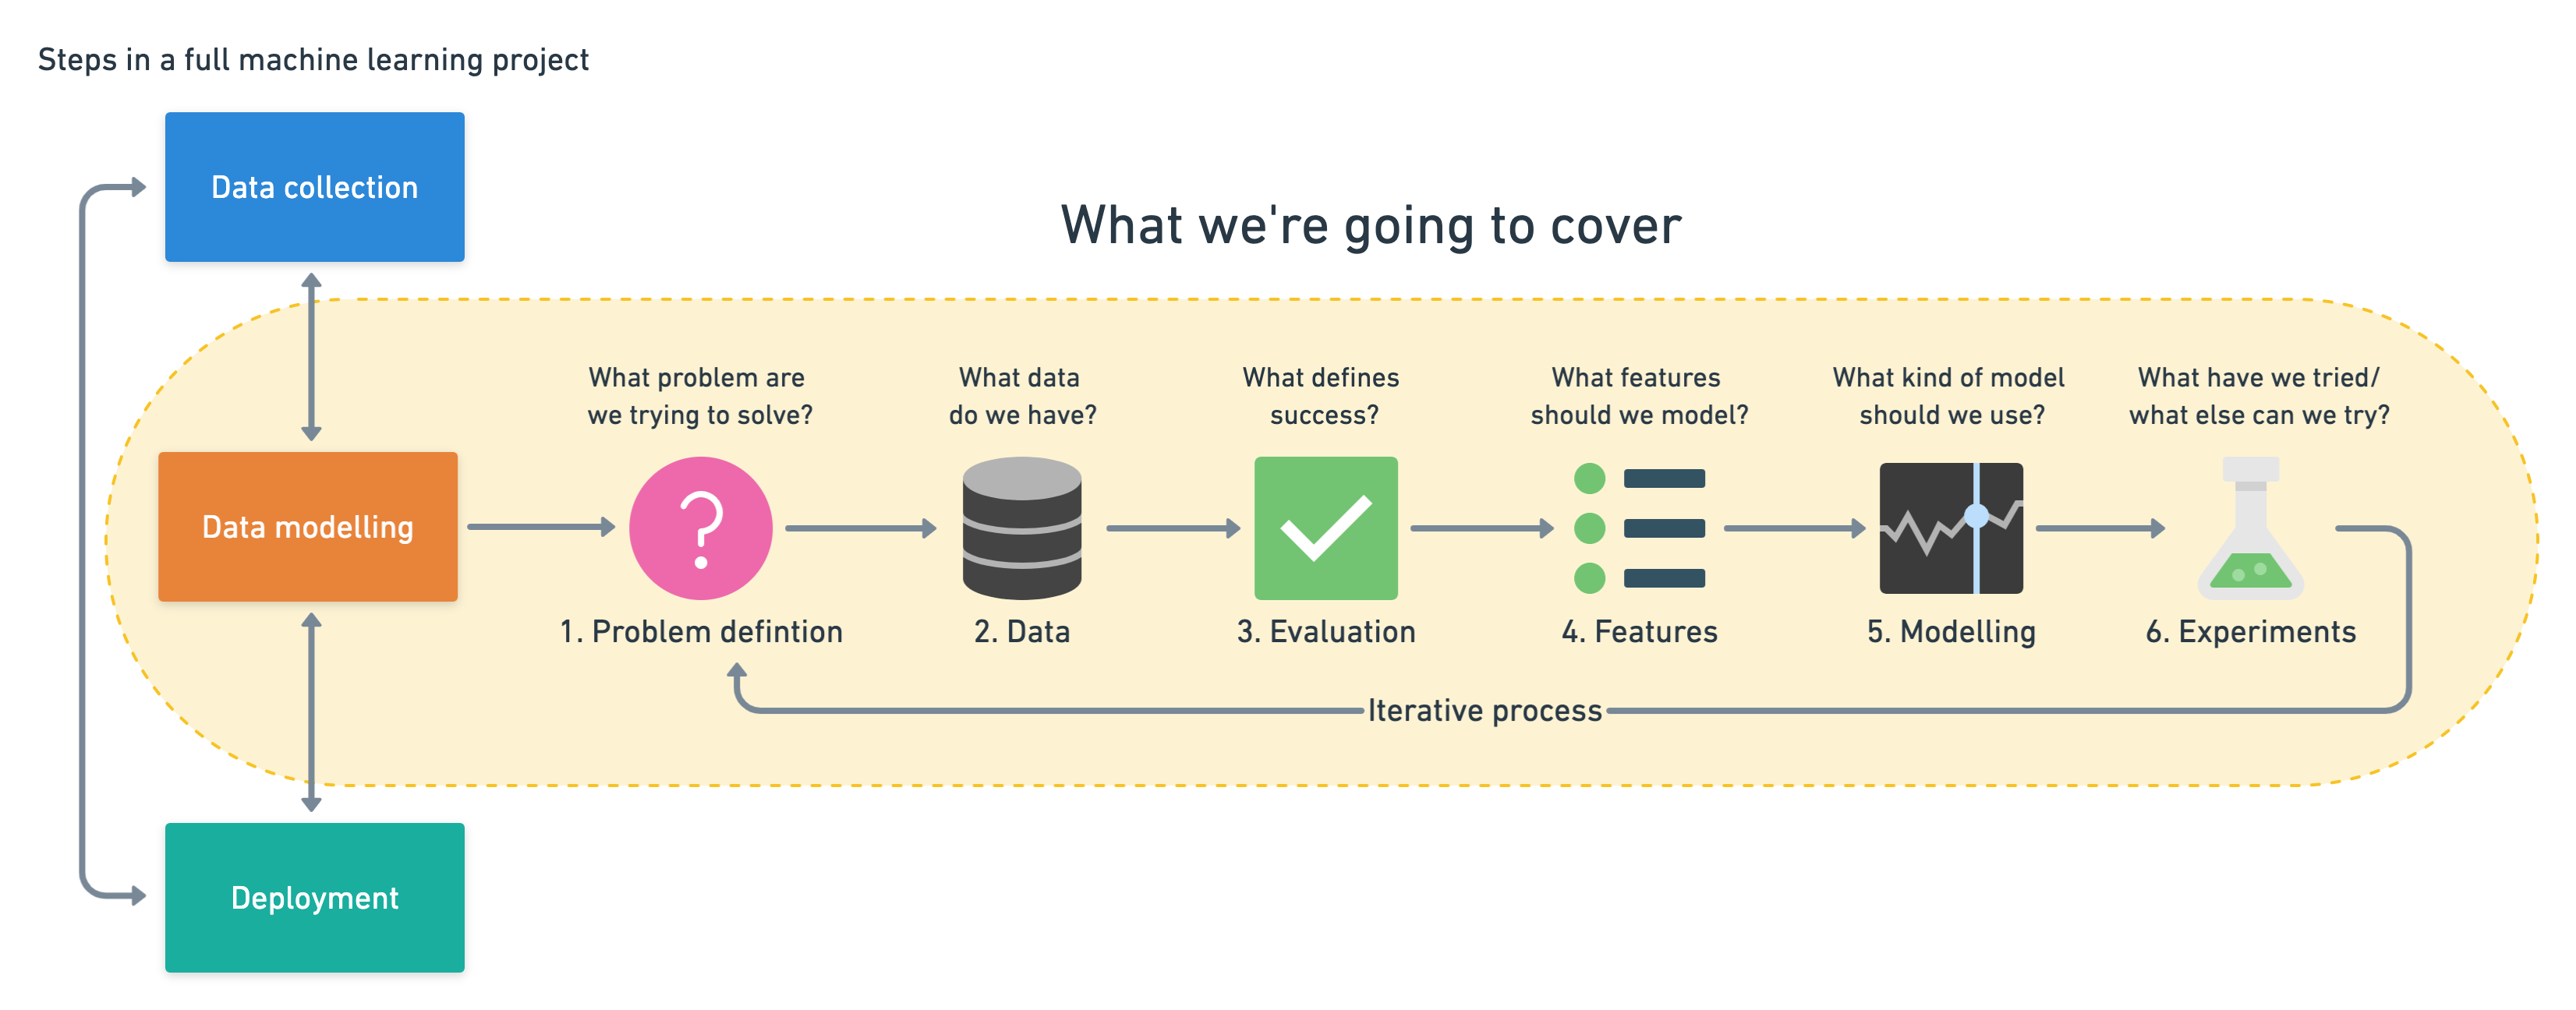

Since we already possess the dataset, we will proceed with addressing the problem using the following sequential steps: -

**1) Problem defination**

**2) Data**

**3) EDA & Data Preprocessing**
- Importing necessary libraries and loading the dataset.
- Handling duplicates and missing values (NaN).
- Analyzing correlations among variables.
- Normalizing the data through visualization (plots) and statistical tests.

**4) Feature Engineering & Modelling**
- Implementing baseline models with 10-fold cross-validation.
- Finding the best model using Randomized Grid Search.
- Making predictions using the best model.
- Preparing and submitting the final results.

## **Problem Statement**

The goal of this analysis is to increase the accuracy of house sale price predictions by using historical data and its associated features.

## **Data**

**Source of Data:** [Kaggle Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

Dean De Cock created the Ames Housing dataset for the purpose of data science education. It is a valuable alternative to the well-known Boston Housing dataset, as it is more contemporary and includes additional features.

The competition provided two datasets:
- **train.csv** - This dataset contains historical records of house sales prices, consisting of approximately 1460 examples. The **target** variable in this dataset is the **SalePrice**.
- **test.csv** - The test dataset, on the other hand, has a sample size of approximately 1458.

Let's start with by importing some python libraries.


In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")


In [ ]:
# Importing data

house_data = pd.read_csv("/content/train.csv")
house_data.rename(columns=lambda x: x.strip().replace(' ', ''), inplace=True)  # Removing white spaces in column names
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Object, float, and int data types make up the majority of the data. There are 81 columns and 1460 rows. 

In [ ]:
house_data.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [ ]:
house_data.tail(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1450  1451          90       RL         60.0     9000   Pave   NaN      Reg   
1451  1452          20       RL         78.0     9262   Pave   NaN      Reg   
1452  1453         180       RM         35.0     3675   Pave   NaN      Reg   
1453  1454          20       RL         90.0    17217   Pave   NaN      Reg   
1454  1455          20       FV         62.0     7500   Pave  Pave      Reg   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1450         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1451         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1452         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1453         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1454         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1450      9   2009        WD         Normal     136000  
1451      5   2009       New        Partial     287090  
1452      5   2006        WD         Normal     145000  
1453      7   2006        WD        Abnorml      84500  
1454     10   2009        WD         Normal     185000  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[10 rows x 81 columns]

## **Exploratory Data Analysis (EDA) & Visualization**

It is important to understand data before working with it. Exploratory data analysis (EDA) is a crucial step in this process. EDA is a combination of visualizations and statistical analysis (uni, bi, and multivariate) that helps us to better understand the data and gain insight into its relationships. Let's explore our target variable and how the other features influence it.


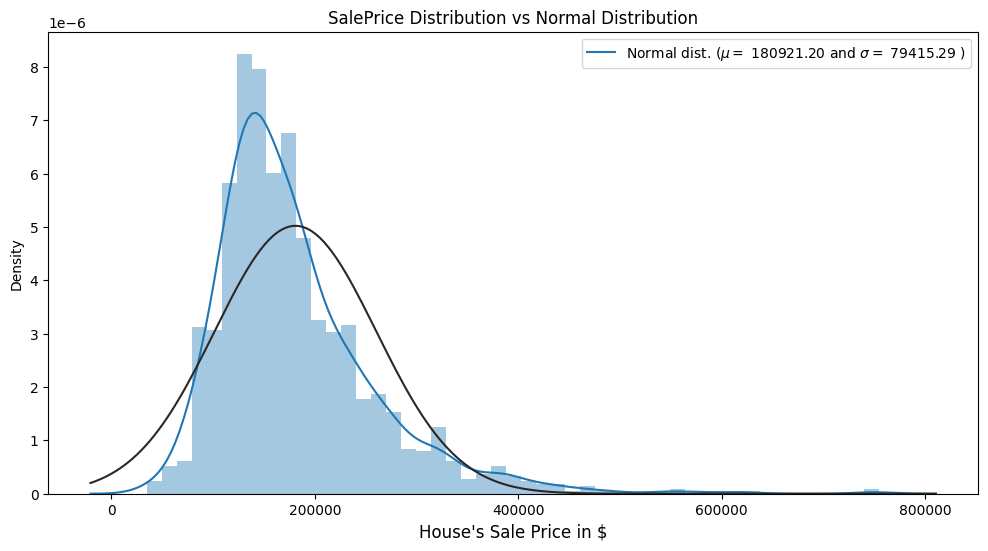

In [ ]:
# Fit the data to a normal distribution
mu, sigma = np.mean(house_data['SalePrice']), np.std(house_data['SalePrice'])

# Plot the distribution of SalePrice
plt.figure(figsize=(12, 6))
sns.distplot(house_data['SalePrice'], kde=True, hist=True, fit=norm)
plt.title('SalePrice Distribution vs Normal Distribution', fontsize=12)
plt.xlabel("House's Sale Price in $", fontsize=12)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.show()

In the literature, skewness values between -0.5 and 0.5 and kurtosis values between -2 and 2 are considered acceptable. However, the plot shows that the distribution is not normal, but is highly right-skewed. This is also supported by the Shapiro test for normality, which returned a very small p-value, indicating that we can reject the hypothesis of normality. Despite this, we will leave the distribution as it is for now, as we will address this issue later in the notebook.

In [ ]:
# Skew and kurt
from scipy.stats import skew, kurtosis, shapiro

sale_price = house_data['SalePrice']

skewness = skew(np.abs(sale_price))
kurtosis_value = kurtosis(np.abs(sale_price))
shapiro_test = shapiro(sale_price)

print("Skewness: %f" % skewness)
print("Kurtosis: %f" % kurtosis_value)
print("Shapiro_Test: %f" % shapiro_test[0])
print("Shapiro_Test: %f" % shapiro_test[1])

Skewness: 1.880941
Kurtosis: 6.509812
Shapiro_Test: 0.869673
Shapiro_Test: 0.000000


The correlation matrix is a useful tool for identifying the numerical relationships between features. We can use it to see which features are most correlated with our target variable.

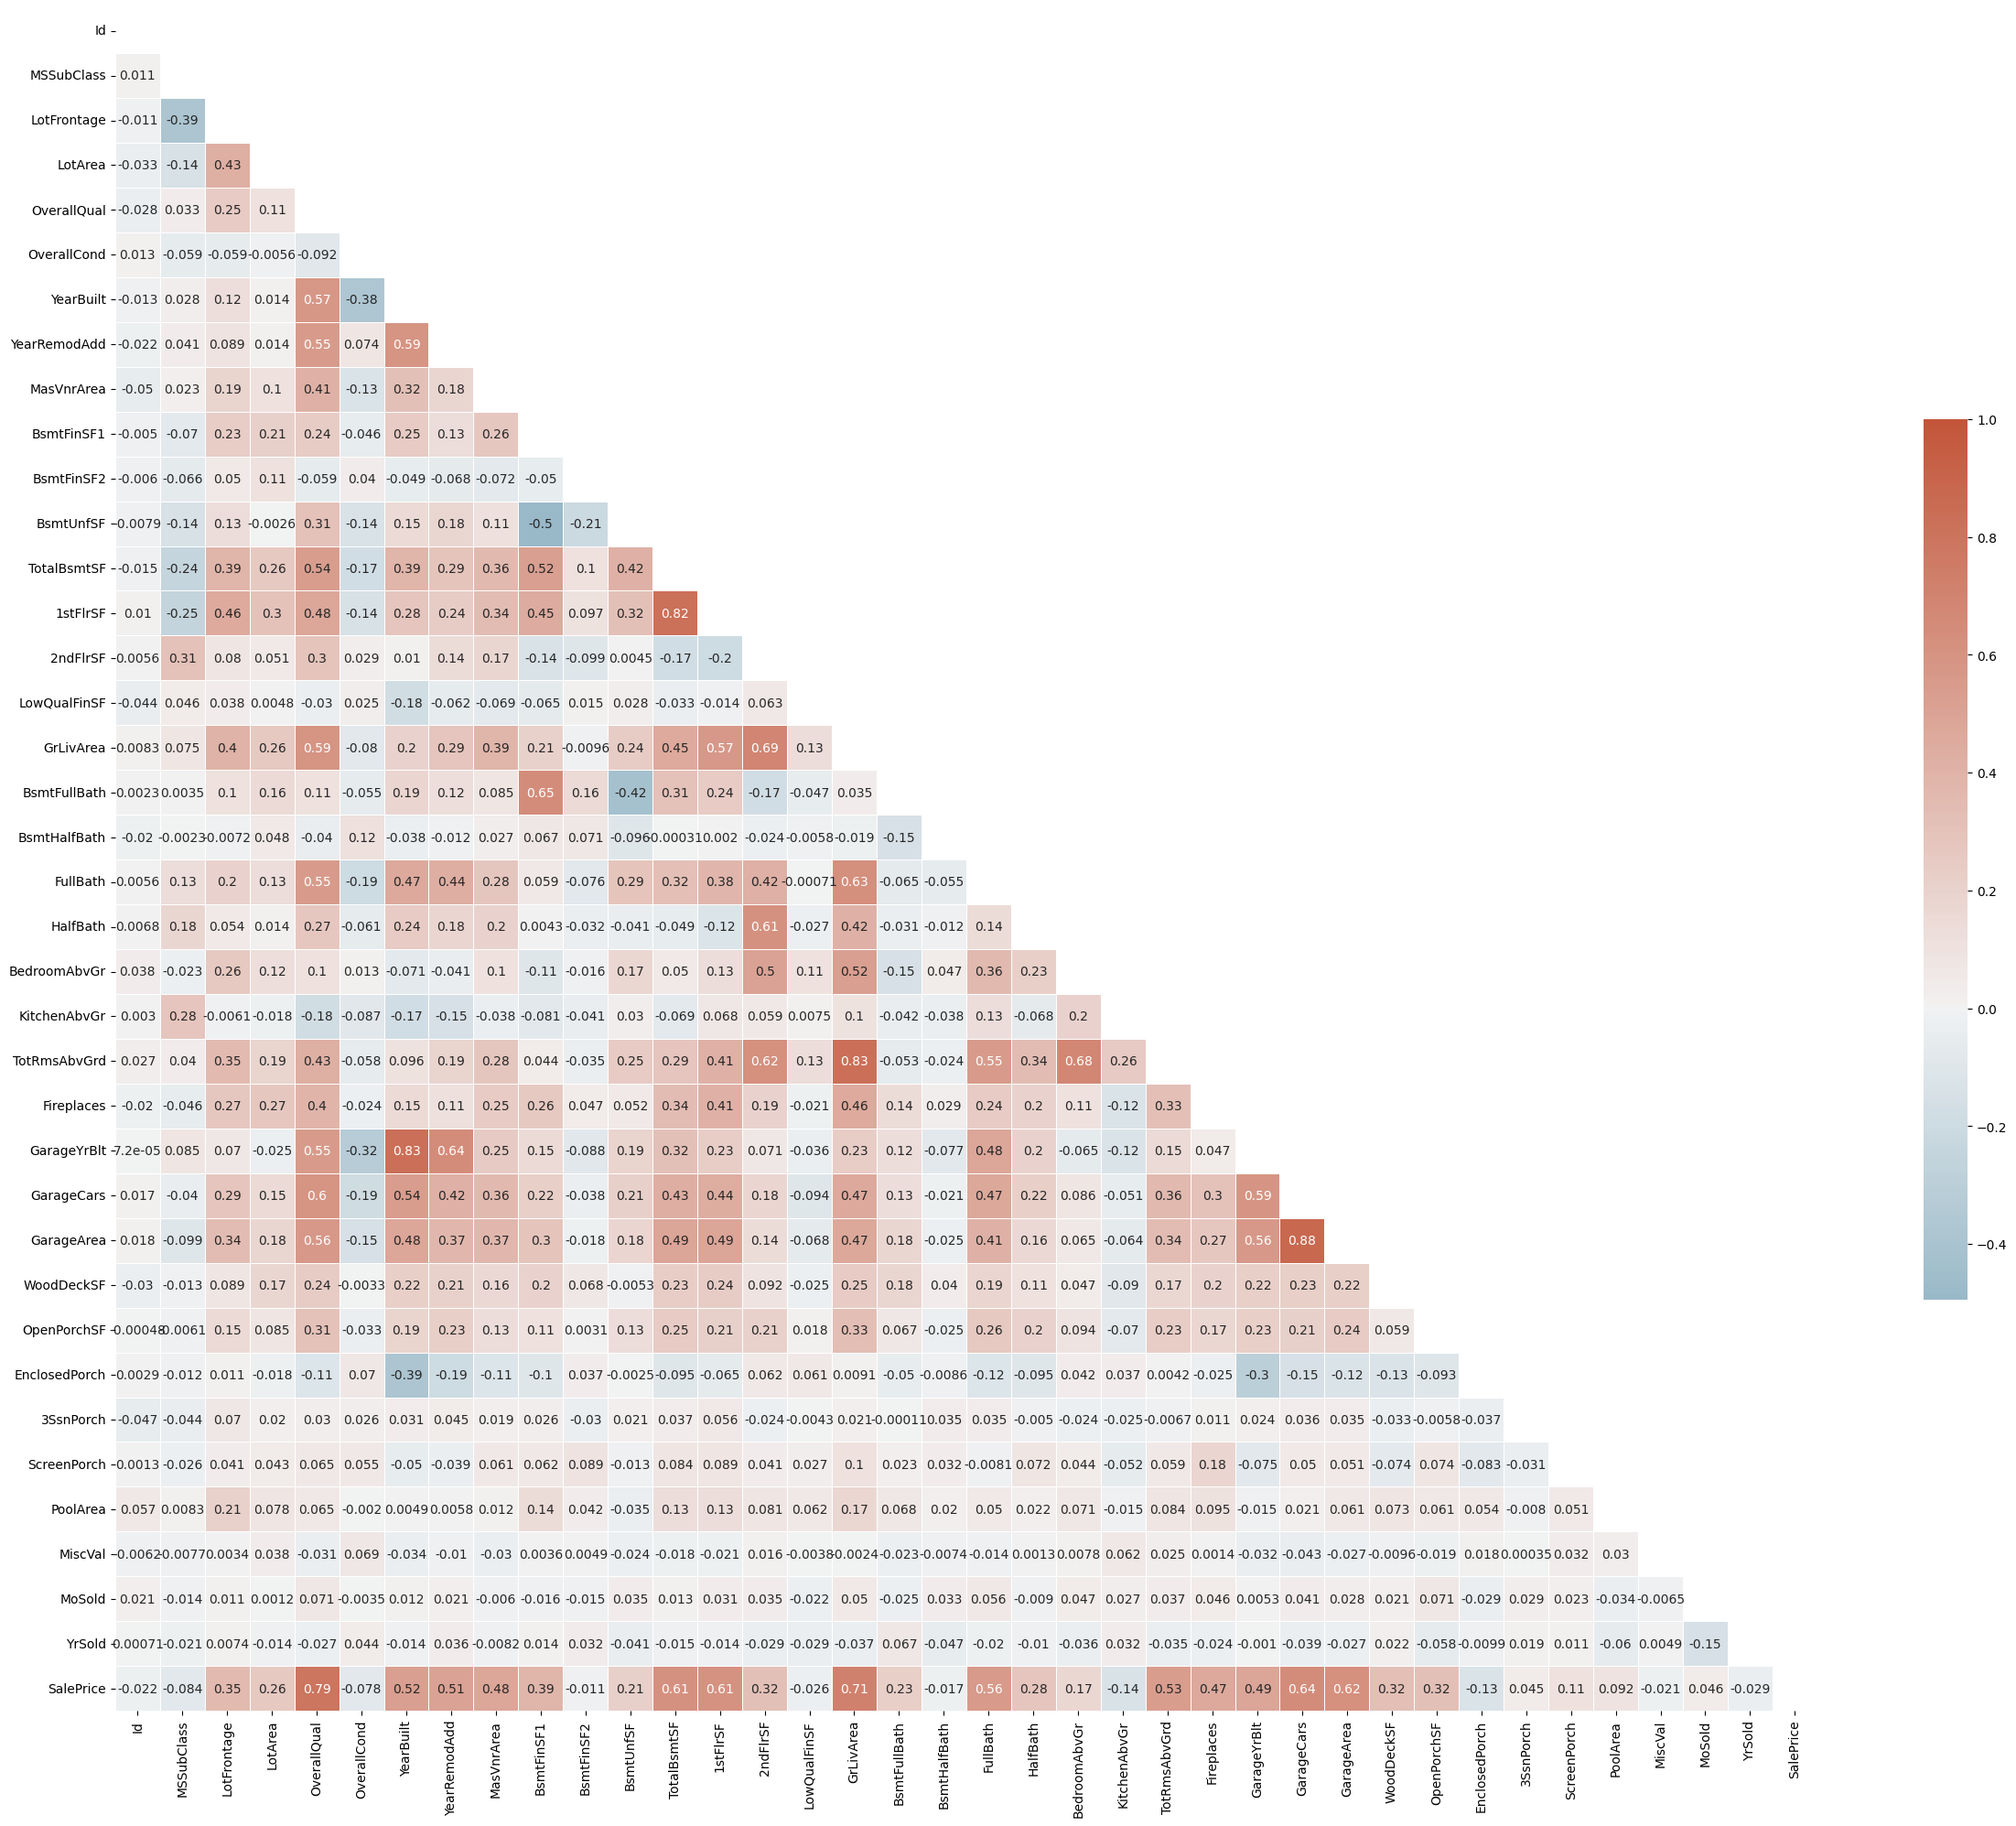

In [ ]:
# Correlation Matrix
plt.figure(figsize=(30, 25))
corr_matrix = house_data.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0, annot=True,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})
plt.show()

Now that we have identified the features that are most correlated with our target variable, we can investigate them further.

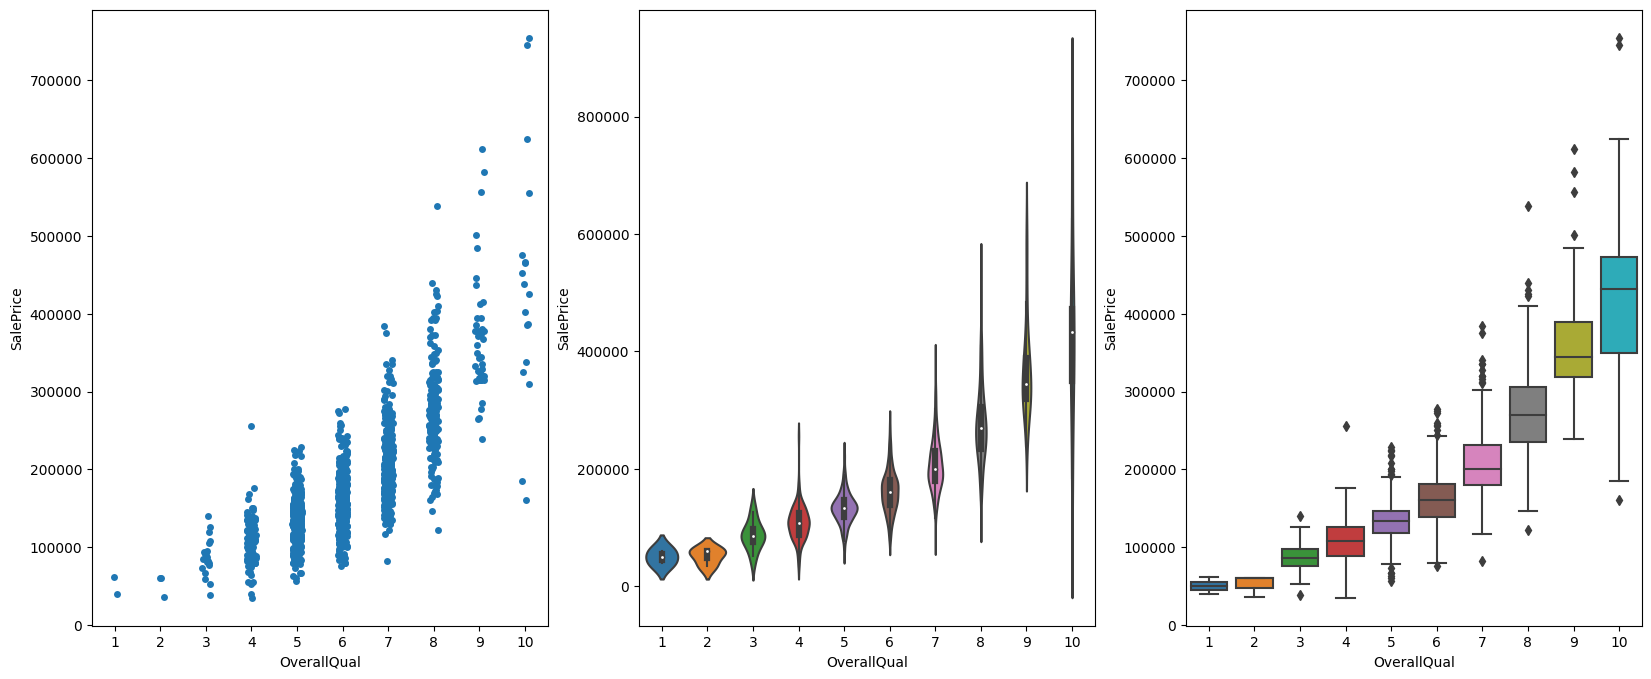

In [ ]:
# OverallQuall - SalePrice [Pearson = 0.8]
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Strip plot
sns.stripplot(data=house_data, x='OverallQual', y='SalePrice', ax=axes[0])

# Violin plot
sns.violinplot(data=house_data, x='OverallQual', y='SalePrice', ax=axes[1])

# Box plot
sns.boxplot(data=house_data, x='OverallQual', y='SalePrice', ax=axes[2])

plt.show()

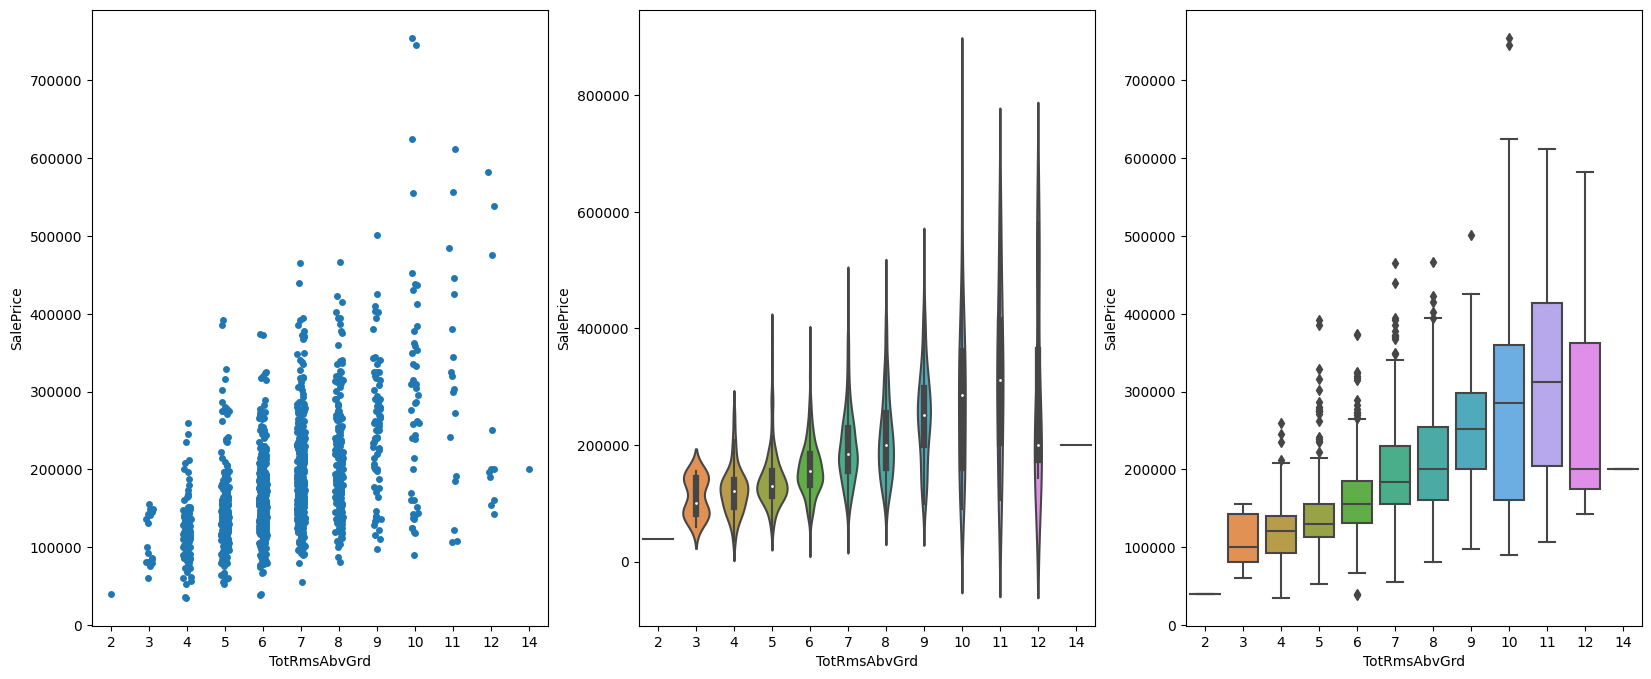

In [ ]:
# TotRmsAbvGrd - SalePrice [Pearson = 0.50]

fig, axs = plt.subplots(1, 3, figsize=(20, 8))
sns.stripplot(data=house_data, x='TotRmsAbvGrd', y='SalePrice', ax=axs[0])
sns.violinplot(data=house_data, x='TotRmsAbvGrd', y='SalePrice', ax=axs[1])
sns.boxplot(data=house_data, x='TotRmsAbvGrd', y='SalePrice', ax=axs[2])
plt.show()

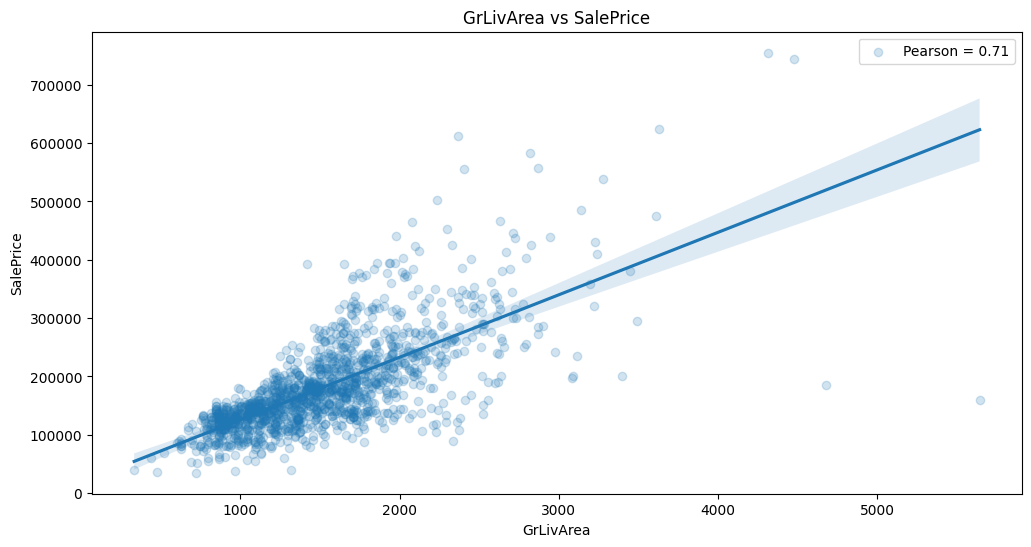

In [ ]:
# GrLivArea vs SalePrice [corr = 0.71]

pearson_grliv = 0.71

plt.figure(figsize=(12, 6))
sns.regplot(data=house_data, x='GrLivArea', y='SalePrice', scatter_kws={'alpha': 0.2})
plt.title('GrLivArea vs SalePrice', fontsize=12)
plt.legend(['Pearson = {:.2f}'.format(pearson_grliv)], loc='best')
plt.show()

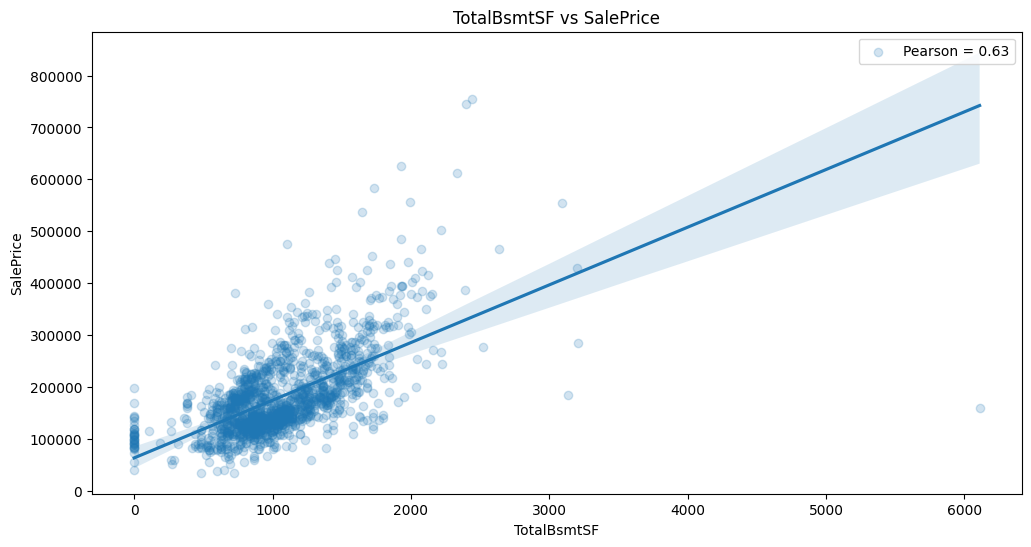

In [ ]:
Pearson_TBSF = 0.63

plt.figure(figsize=(12, 6))
sns.regplot(data=house_data, x='TotalBsmtSF', y='SalePrice', scatter_kws={'alpha': 0.2})
plt.title('TotalBsmtSF vs SalePrice', fontsize=12)
plt.legend(['Pearson = {:.2f}'.format(Pearson_TBSF)], loc='best')
plt.show()

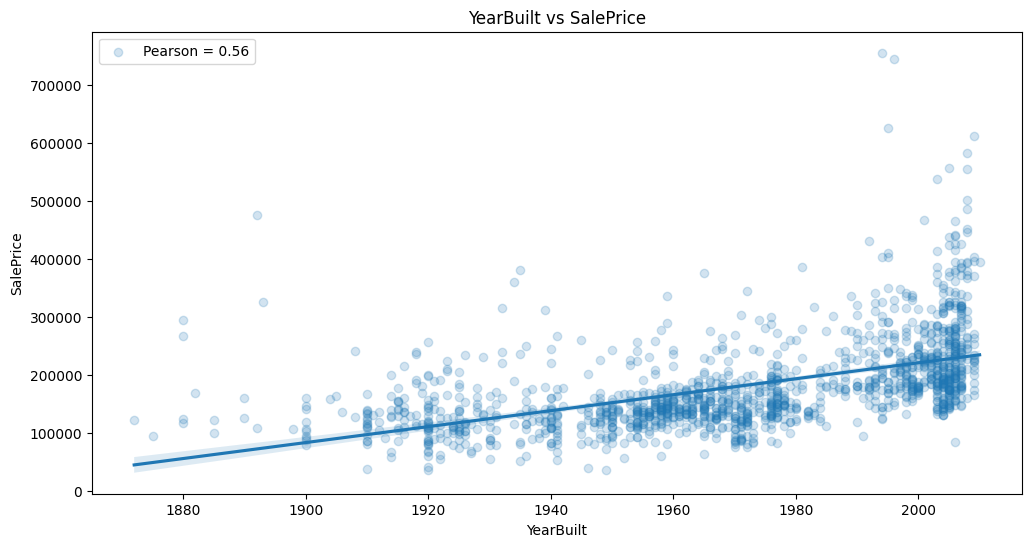

In [ ]:
# YearBuilt vs SalePrice

Pearson_YrBlt = 0.56
plt.figure(figsize=(12, 6))
sns.regplot(x=house_data['YearBuilt'], y=house_data['SalePrice'], scatter_kws={'alpha': 0.2})
plt.title('YearBuilt vs SalePrice', fontsize=12)
plt.legend(['Pearson = {:.2f}'.format(Pearson_YrBlt)], loc='best')
plt.show()

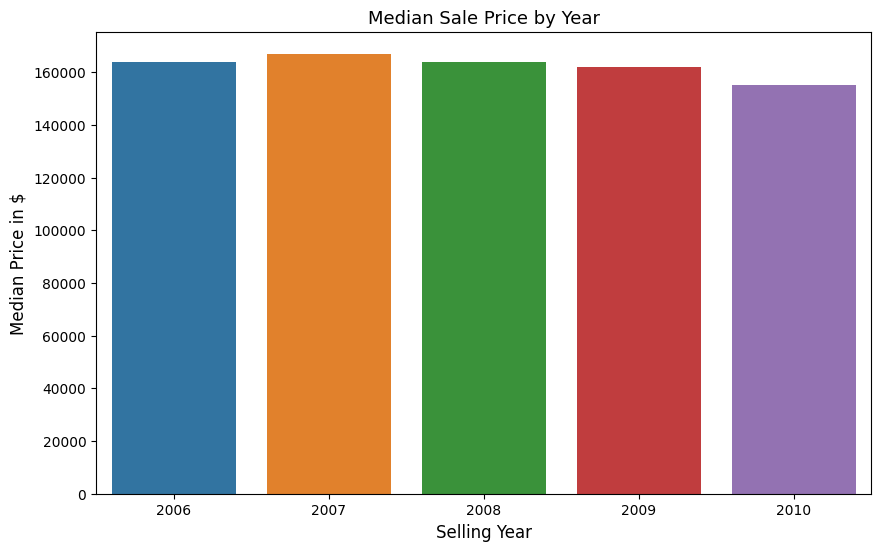

In [ ]:
# Median of Sale Price by Year

plt.figure(figsize=(10, 6))
median_price_by_year = house_data.groupby('YrSold')['SalePrice'].median()
sns.barplot(x=median_price_by_year.index, y=median_price_by_year.values)
plt.title('Median Sale Price by Year', fontsize=13)
plt.xlabel('Selling Year', fontsize=12)
plt.ylabel('Median Price in $', fontsize=12)
plt.show()

## **Data Preprocsessing**
Now that we have some understanding of the data, we need to prepare it for modelling. The main steps are: -
- Looking at potential NaN
- Dealing with categorical features (e.g. Dummy coding)
- Normalization


In real-world projects, test data is often not available until the end of the project. This is why it is important to make sure that the test data is similar to the training data so that it can be preprocessed in the same way. In this case, the test data is available but it contains some observations that are not present in the training dataset. This could cause problems if dummy coding is used, as this could lead to inaccurate predictions on the test set. The easiest way to solve this problem is to concatenate the training and test sets, preprocess them together, and then divide them back into separate sets. This ensures that the test data is processed in the same way as the training data, which will help to ensure that the predictions on the test set are accurate.

In [ ]:
# Separating Target and Features

test = pd.read_csv("/content/test.csv")

target = house_data['SalePrice']
test_id = test['Id']
test = test.drop(['Id'],axis = 1)
house_data2 = house_data.drop(['SalePrice','Id'], axis = 1)

# Concatenating train & test set

train_test = pd.concat([house_data2,test], axis=0, sort=False)

In [ ]:
# Looking at NaN % within the data

nan_sum = train_test.isna().sum()
nan = pd.DataFrame({
'NaN_sum': nan_sum,
'feat': nan_sum.index,
'Perc(%)': (nan_sum / 1460) * 100
})
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by='NaN_sum')
nan['Usability'] = np.where(nan['Perc(%)'] > 20, 'Discard', 'Keep')
nan

NaN_sum          feat     Perc(%) Usability
TotalBsmtSF         1   TotalBsmtSF    0.068493      Keep
GarageArea          1    GarageArea    0.068493      Keep
GarageCars          1    GarageCars    0.068493      Keep
KitchenQual         1   KitchenQual    0.068493      Keep
Electrical          1    Electrical    0.068493      Keep
BsmtUnfSF           1     BsmtUnfSF    0.068493      Keep
BsmtFinSF2          1    BsmtFinSF2    0.068493      Keep
BsmtFinSF1          1    BsmtFinSF1    0.068493      Keep
SaleType            1      SaleType    0.068493      Keep
Exterior1st         1   Exterior1st    0.068493      Keep
Exterior2nd         1   Exterior2nd    0.068493      Keep
Functional          2    Functional    0.136986      Keep
Utilities           2     Utilities    0.136986      Keep
BsmtHalfBath        2  BsmtHalfBath    0.136986      Keep
BsmtFullBath        2  BsmtFullBath    0.136986      Keep
MSZoning            4      MSZoning    0.273973      Keep
MasVnrArea         23    MasVnrArea    1.575342      Keep
MasVnrType         24    MasVnrType    1.643836      Keep
BsmtFinType1       79  BsmtFinType1    5.410959      Keep
BsmtFinType2       80  BsmtFinType2    5.479452      Keep
BsmtQual           81      BsmtQual    5.547945      Keep
BsmtCond           82      BsmtCond    5.616438      Keep
BsmtExposure       82  BsmtExposure    5.616438      Keep
GarageType        157    GarageType   10.753425      Keep
GarageCond        159    GarageCond   10.890411      Keep
GarageQual        159    GarageQual   10.890411      Keep
GarageYrBlt       159   GarageYrBlt   10.890411      Keep
GarageFinish      159  GarageFinish   10.890411      Keep
LotFrontage       486   LotFrontage   33.287671   Discard
FireplaceQu      1420   FireplaceQu   97.260274   Discard
Fence            2348         Fence  160.821918   Discard
Alley            2721         Alley  186.369863   Discard
MiscFeature      2814   MiscFeature  192.739726   Discard
PoolQC           2909        PoolQC  199.246575   Discard

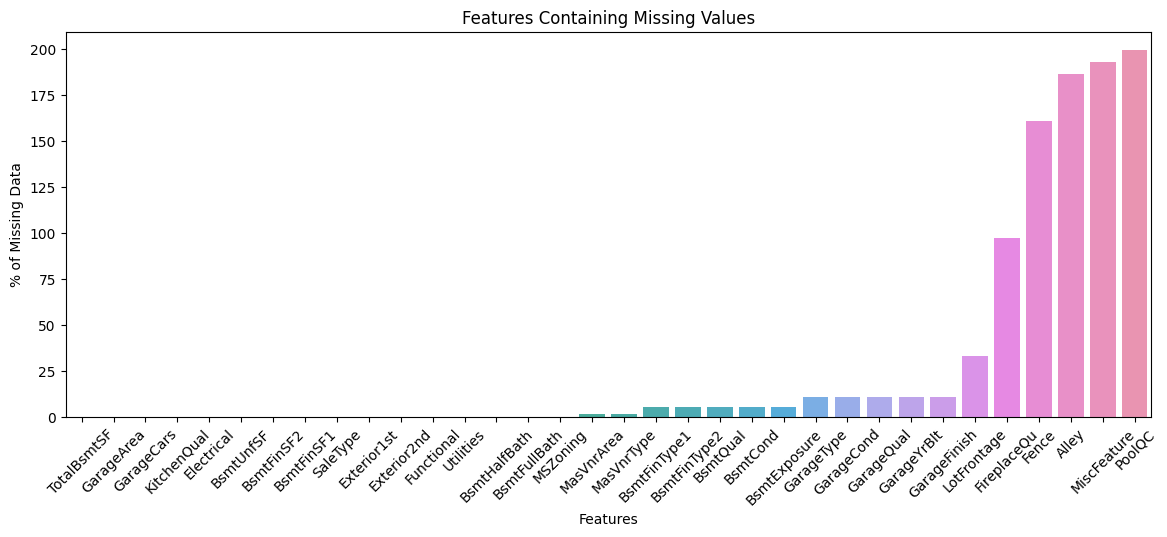

In [ ]:
# Plotting Nan

fig, ax = plt.subplots(figsize=(14, 5))
sns.barplot(x=nan['feat'], y=nan['Perc(%)'], ax=ax)
ax.set_xticklabels(nan['feat'], rotation=45)
ax.set_title('Features Containing Missing Values')
ax.set_xlabel('Features')
ax.set_ylabel('% of Missing Data')
plt.show()

We cannot be certain that all of these NaNs are real missing values. The given description file shows that many of these NaNs represent the absence of something, and therefore are not actually missing values. We can impute these values (for numerical features) or substitute them with data from the file.

In [ ]:
# Converting non-numeric predictors stored as numbers into strings
train_test['MSSubClass'] = train_test['MSSubClass'].astype(str)
train_test['YrSold'] = train_test['YrSold'].astype(str)
train_test['MoSold'] = train_test['MoSold'].astype(str)

# Filling categorical NaN values with predetermined replacements
train_test['Functional'].fillna('Typ', inplace=True)
train_test['Electrical'].fillna('SBrkr', inplace=True)
train_test['KitchenQual'].fillna('TA', inplace=True)
train_test['Exterior1st'].fillna(train_test['Exterior1st'].mode()[0], inplace=True)
train_test['Exterior2nd'].fillna(train_test['Exterior2nd'].mode()[0], inplace=True)
train_test['SaleType'].fillna(train_test['SaleType'].mode()[0], inplace=True)
train_test['PoolQC'].fillna('None', inplace=True)
train_test['Alley'].fillna('None', inplace=True)
train_test['FireplaceQu'].fillna('None', inplace=True)
train_test['Fence'].fillna('None', inplace=True)
train_test['MiscFeature'].fillna('None', inplace=True)

train_test['GarageArea'].fillna(0, inplace=True)
train_test['GarageCars'].fillna(0, inplace=True)

train_test['GarageType'].fillna('None', inplace=True)
train_test['GarageFinish'].fillna('None', inplace=True)
train_test['GarageQual'].fillna('None', inplace=True)
train_test['GarageCond'].fillna('None', inplace=True)

train_test['BsmtQual'].fillna('None', inplace=True)
train_test['BsmtCond'].fillna('None', inplace=True)
train_test['BsmtExposure'].fillna('None', inplace=True)
train_test['BsmtFinType1'].fillna('None', inplace=True)
train_test['BsmtFinType2'].fillna('None', inplace=True)

# Checking the remaining features with NaN values
for col in train_test.columns:
    if train_test[col].isnull().sum() > 0:
        print(train_test[col][0])

0    RL
0    RH
Name: MSZoning, dtype: object
0    65.0
0    80.0
Name: LotFrontage, dtype: float64
0    AllPub
0    AllPub
Name: Utilities, dtype: object
0    BrkFace
0       None
Name: MasVnrType, dtype: object
0    196.0
0      0.0
Name: MasVnrArea, dtype: float64
0    706.0
0    468.0
Name: BsmtFinSF1, dtype: float64
0      0.0
0    144.0
Name: BsmtFinSF2, dtype: float64
0    150.0
0    270.0
Name: BsmtUnfSF, dtype: float64
0    856.0
0    882.0
Name: TotalBsmtSF, dtype: float64
0    1.0
0    0.0
Name: BsmtFullBath, dtype: float64
0    0.0
0    0.0
Name: BsmtHalfBath, dtype: float64
0    2003.0
0    1961.0
Name: GarageYrBlt, dtype: float64


In [ ]:
# Removing the useless variables
useless = ['GarageYrBlt', 'YearRemodAdd']
train_test = train_test.drop(useless, axis=1)

# Imputing with KNNRegressor (other imputers can also be used)
def impute_knn(df):
    ttn = train_test.select_dtypes(include=[np.number])
    ttc = train_test.select_dtypes(exclude=[np.number])

    cols_nan = ttn.columns[ttn.isna().any()].tolist()  # columns with NaN
    cols_no_nan = ttn.columns.difference(cols_nan).values  # columns without NaN

    for col in cols_nan:
        imp_test = ttn[ttn[col].isna()]  # indices with missing data as the test set
        imp_train = ttn.dropna()  # indices without missing data
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ttn.loc[ttn[col].isna(), col] = knr.predict(imp_test[cols_no_nan])

    return pd.concat([ttn, ttc], axis=1)

train_test = impute_knn(train_test)

objects = []
for i in train_test.columns:
    if train_test[i].dtype == object:
        objects.append(i)
train_test.update(train_test[objects].fillna('None'))

# Checking NaN presence
for col in train_test:
    if train_test[col].isna().sum() > 0:
        print(train_test[col].iloc[0])


## **Feature Engineering**

Let's combine existing features to create new ones. These could improve the model's performance.

In [ ]:
train_test["SqFtPerRoom"] = train_test["GrLivArea"] / (train_test["TotRmsAbvGrd"] +
                                                       train_test["FullBath"] +
                                                       train_test["HalfBath"] +
                                                       train_test["KitchenAbvGr"])

train_test['Total_Home_Quality'] = train_test['OverallQual'] + train_test['OverallCond']

train_test['Total_Bathrooms'] = (train_test['FullBath'] + (0.5 * train_test['HalfBath']) +
                               train_test['BsmtFullBath'] + (0.5 * train_test['BsmtHalfBath']))

train_test["HighQualSF"] = train_test["1stFlrSF"] + train_test["2ndFlrSF"]

# Converting non-numeric predictors stored as numbers into strings

train_test['MSSubClass'] = train_test['MSSubClass'].astype(str)
train_test['YrSold'] = train_test['YrSold'].astype(str)
train_test['MoSold'] = train_test['MoSold'].astype(str)

# Creating dummy variables from categorical features

train_test_dummy = pd.get_dummies(train_test)

# Fetching all numeric features

numeric_features = train_test_dummy.select_dtypes(include=[np.number]).columns
skewed_features = train_test_dummy[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

# Normalizing skewed features using log transformation

for i in skew_index:
    train_test_dummy[i] = np.log1p(train_test_dummy[i])

Let's try to transform our target distribution into a normal distribution. We can do this by using a log transformation. A qq-plot can be used to see the effect of the transformation.

A qq-plot is a graphical method for comparing two probability distributions. It plots the quantiles of one distribution against the quantiles of another distribution. In this case, we will plot the quantiles of the original target distribution against the quantiles of the log-transformed target distribution.

If the transformation has been successful, the qq-plot should be a straight line. This indicates that the two distributions are similar.

If the qq-plot is not a straight line, this indicates that the transformation has not been successful. In this case, we may need to try a different transformation.

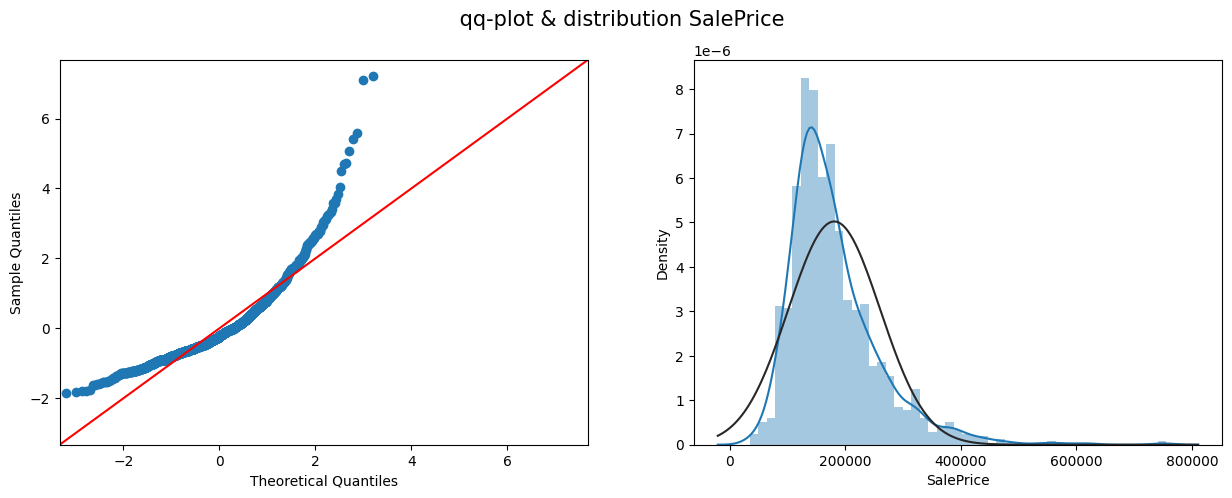

In [ ]:
# SalePrice before transformation

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])

sns.distplot(target, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

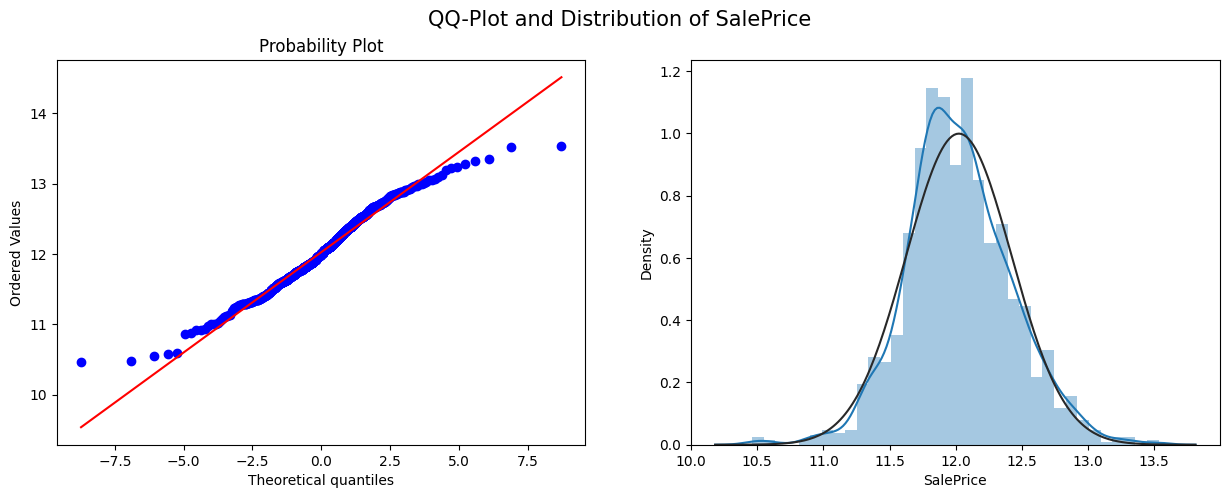

In [ ]:
# SalePrice after transformation

target_log = np.log1p(target)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("QQ-Plot and Distribution of SalePrice", fontsize=15)

stats.probplot(target_log, dist=stats.t, sparams=(4,), plot=ax[0])
sns.distplot(target_log, kde=True, hist=True, fit=stats.norm, ax=ax[1])
plt.show()

## **Modelling**

As mentioned in the problem definition, we are trying to predict the sales price of houses. Our goal is to create the best model that predicts the most accurate results. 

**Which estimator should we use?**

We can use the sklearn library to help us choose the right estimator for our model. The sklearn library provides a number of different estimators, each with its own strengths and weaknesses. We can use the graphs provided by the sklearn library to compare the performance of different estimators on our data. This will help us to choose the estimator that is most likely to produce the most accurate results.

Choosing the right estimator for a machine learning problem can be challenging. Different estimators are better suited for different types of data and different problems. The flowchart below provides a rough guide on how to approach problems with regard to which estimators to try on your data.

([Refrence link](https://medium.com/@chris_bour/an-extended-version-of-the-scikit-learn-cheat-sheet-5f46efc6cbb))

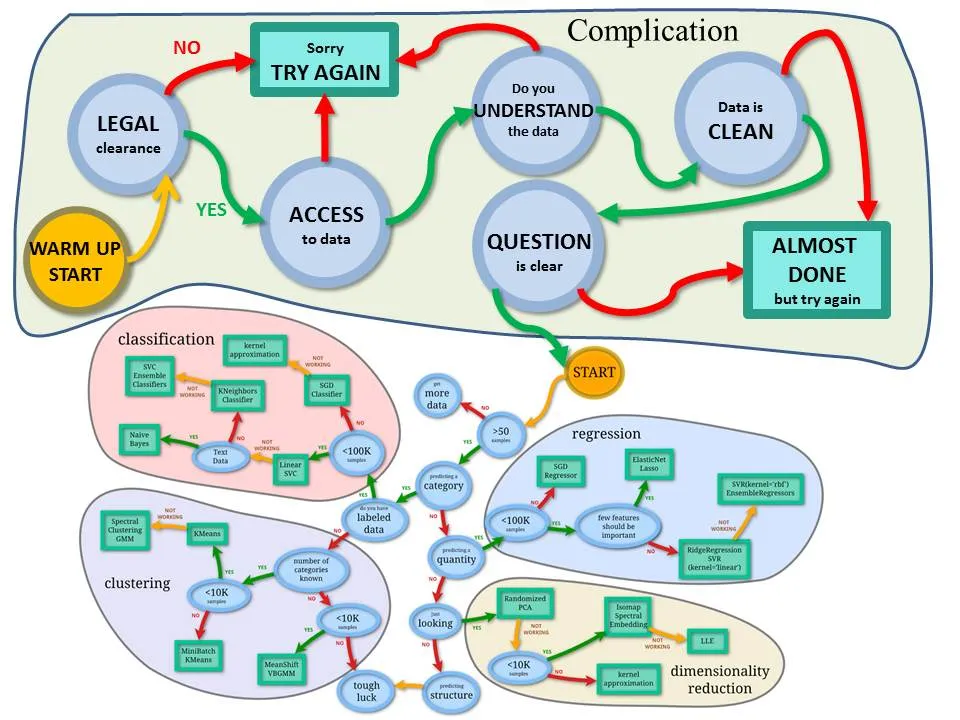

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 15.5 MB/s eta 0:00:00


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.7 MB/s eta 0:00:00


In [ ]:
# Importing required libraries
import shap
import xgboost as xgb
from catboost import Pool
from catboost import CatBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

To train a model, we first need to split the data into a training set and a test set.

In [ ]:
# Train-Test separation
train = train_test_dummy[0:1460]
test = train_test_dummy[1460:]
test['Id'] = test_id

# As for the evaluation function, we need the root mean squared error(RMSE).
# Creation of the RMSE metric:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train, target_log, scoring="neg_mean_squared_error", cv=kf))
    return rmse

In [ ]:
# 10 Fold Cross validation
kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_scores = []
cv_std = []

baseline_models = ['Linear_Reg.', 'Dec_Tree_Reg.','Random_Forest_Reg.', 'Grad_Boost_Reg.','Cat_Boost_Reg.']

# Linear Regression
lreg = LinearRegression()
score_lreg = cv_rmse(lreg)
cv_scores.append(score_lreg.mean())
cv_std.append(score_lreg.std())

# Decision Tree Regressor
dtr = DecisionTreeRegressor()
score_dtr = cv_rmse(dtr)
cv_scores.append(score_dtr.mean())
cv_std.append(score_dtr.std())

# Random Forest Regressor
rfr = RandomForestRegressor()
score_rfr = cv_rmse(rfr)
cv_scores.append(score_rfr.mean())
cv_std.append(score_rfr.std())

# Gradient Boost Regressor
gbr = GradientBoostingRegressor()
score_gbr = cv_rmse(gbr)
cv_scores.append(score_gbr.mean())
cv_std.append(score_gbr.std())

# Cat Boost Regressor
catb = CatBoostRegressor()
score_catb = cv_rmse(catb)
cv_scores.append(score_catb.mean())
cv_std.append(score_catb.std())

final_cv_score = pd.DataFrame({'Regressors': baseline_models, 'RMSE_mean': cv_scores, 'RMSE_std': cv_std})

Streaming output truncated to the last 5000 lines.
4:	learn: 0.3514870	total: 36.3ms	remaining: 7.22s
5:	learn: 0.3427397	total: 42.6ms	remaining: 7.06s
6:	learn: 0.3347144	total: 49ms	remaining: 6.96s
7:	learn: 0.3270558	total: 55.7ms	remaining: 6.91s
8:	learn: 0.3189478	total: 62.3ms	remaining: 6.86s
9:	learn: 0.3111859	total: 69ms	remaining: 6.83s
10:	learn: 0.3036006	total: 75.7ms	remaining: 6.81s
11:	learn: 0.2971353	total: 82.5ms	remaining: 6.79s
12:	learn: 0.2905230	total: 88.8ms	remaining: 6.74s
13:	learn: 0.2838031	total: 95.3ms	remaining: 6.71s
14:	learn: 0.2769437	total: 102ms	remaining: 6.7s
15:	learn: 0.2705239	total: 109ms	remaining: 6.69s
16:	learn: 0.2643817	total: 116ms	remaining: 6.69s
17:	learn: 0.2583183	total: 122ms	remaining: 6.68s
18:	learn: 0.2525998	total: 129ms	remaining: 6.66s
19:	learn: 0.2478589	total: 136ms	remaining: 6.66s
20:	learn: 0.2424847	total: 142ms	remaining: 6.64s
21:	learn: 0.2370303	total: 149ms	remaining: 6.63s
22:	learn: 0.2324143	total: 156m

In [ ]:
final_cv_score

Regressors  RMSE_mean  RMSE_std
0         Linear_Reg.   0.141219  0.030362
1       Dec_Tree_Reg.   0.198182  0.024794
2  Random_Forest_Reg.   0.139066  0.021911
3     Grad_Boost_Reg.   0.130242  0.020061
4      Cat_Boost_Reg.   0.118386  0.020130

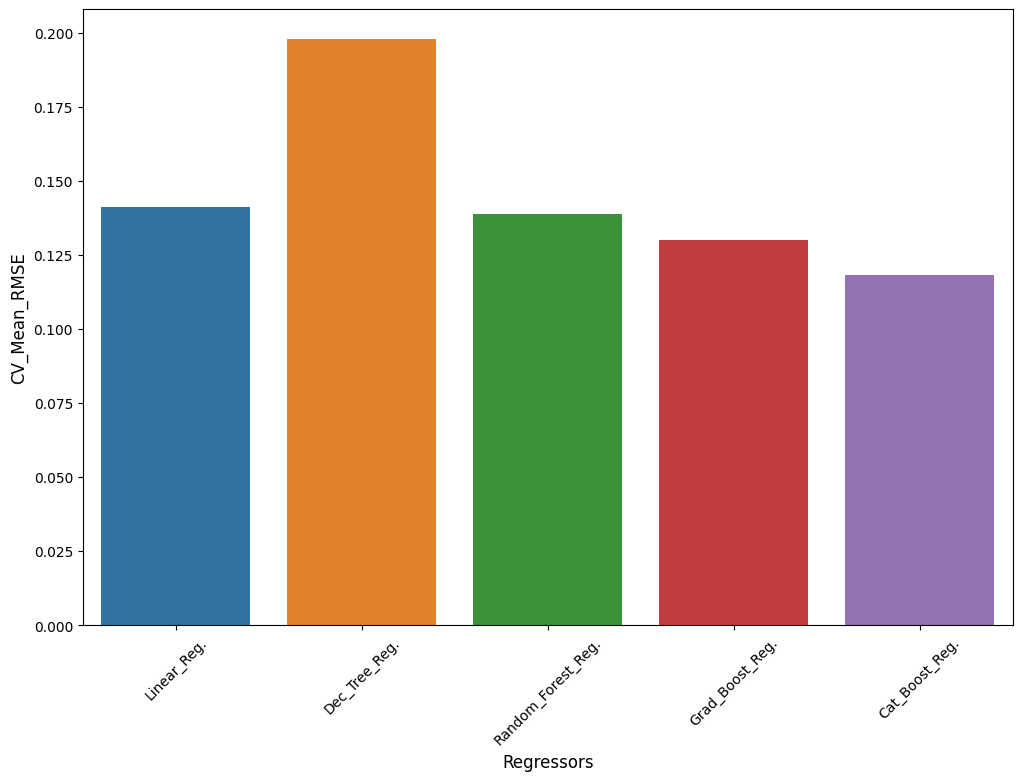

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=final_cv_score, x='Regressors', y='RMSE_mean', ax=ax)
ax.set_xlabel('Regressors', fontsize=12)
ax.set_ylabel('CV_Mean_RMSE', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

We have now developed a model that seems to be working well 😀, as it has a good score and a lower root mean squared error (RMSE). Let's test our model on a test dataset.

### **Why CatBoostRegressor Model?**

The CatBoostRegressor model is chosen for several reasons. First, it is specifically designed to handle categorical variables without the need for manual preprocessing. Second, it is robust to overfitting due to its use of Ordered Boosting and random permutations. Third, it is known for its high performance and competitive results in machine learning competitions. Fourth, it provides automatic parameter tuning, which reduces the need for manual hyperparameter optimization. Fifth, it offers built-in visualization tools that aid in understanding the model and making informed decisions.

Overall, CatBoostRegressor is a popular choice for regression tasks, especially when dealing with categorical features. It simplifies the preprocessing steps and provides good performance out of the box.

In [ ]:
# Train-Test split the data
X_train, X_val, y_train, y_val = train_test_split(train, target_log, test_size=0.1, random_state=42)

# Create a CatBoostRegressor model
cat_model = CatBoostRegressor()
cat_model.fit(X_train, y_train,
              eval_set=(X_val, y_val),
              plot=True,
              verbose=0)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
cat_pred = cat_model.predict(X_val)
cat_score = rmse(y_val, cat_pred)
cat_score

0.1119668110855348

Now, let's examine the top 10 most important variables for our model. This could provide us with additional insight into how the algorithm works and which data it uses most to make its final prediction.

In [ ]:
# Features' importance of our model

feat_imp = cat_model.get_feature_importance(prettified=True)
feat_imp

Feature Id  Importances
0             OverallQual    17.519965
1               GrLivArea     7.478775
2              HighQualSF     6.089177
3      Total_Home_Quality     5.647646
4             TotalBsmtSF     5.003976
..                    ...          ...
331      MiscFeature_Othr     0.000000
332      MiscFeature_TenC     0.000000
333          SaleType_Con     0.000000
334        SaleType_ConLw     0.000000
335  SaleCondition_Alloca     0.000000

[336 rows x 2 columns]

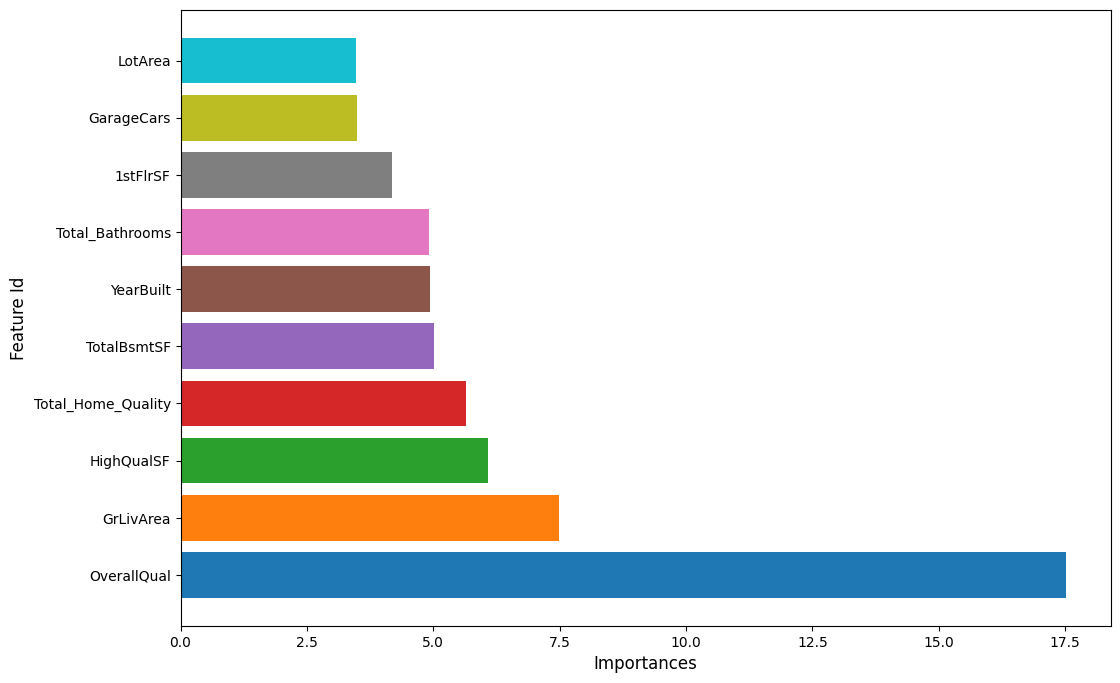

In [ ]:
# Plotting top 10 features' importance

# Generate a color map
cmap = plt.get_cmap('tab10')

# Plotting top 10 features' importance
plt.figure(figsize=(12, 8))

# Generate an array of indices for the bars
indices = np.arange(len(feat_imp['Feature Id'][:10]))

# Assign different colors to each bar
colors = [cmap(i) for i in indices]

# Create the bar plot with different colors
plt.barh(indices, feat_imp['Importances'][:10], color=colors)

plt.xlabel('Importances', fontsize=12)
plt.ylabel('Feature Id', fontsize=12)
plt.yticks(indices, feat_imp['Feature Id'][:10])
plt.show()

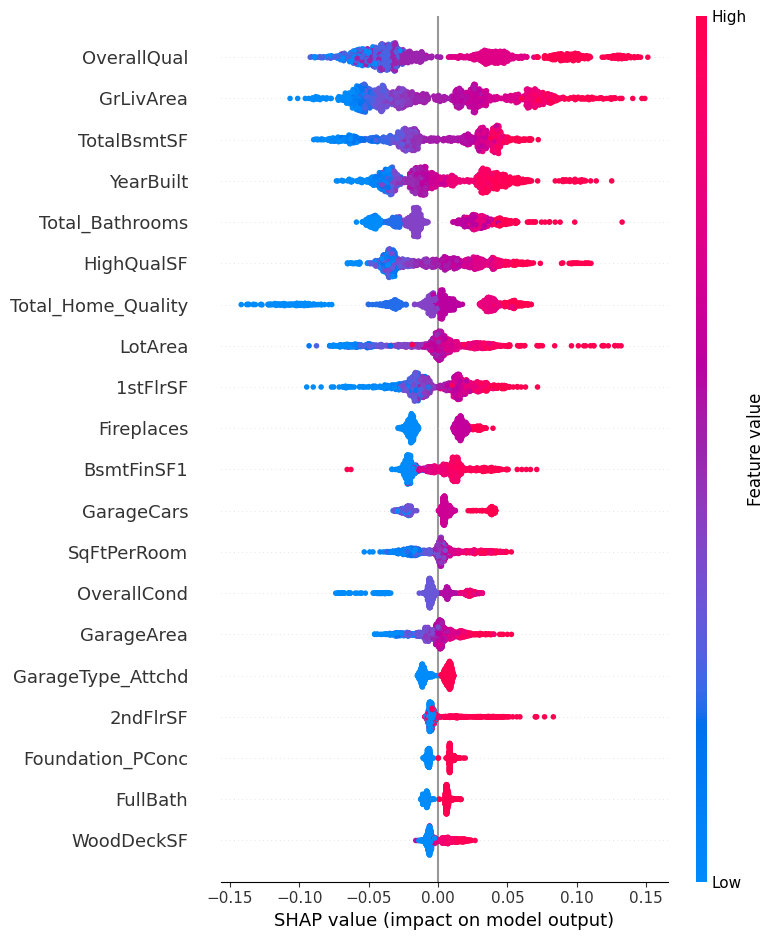

In [ ]:
# Feature importance Interactive Plot 

train_pool = Pool(X_train)
val_pool = Pool(X_val)

explainer = shap.TreeExplainer(cat_model) # insert your model
shap_values = explainer.shap_values(train_pool) # insert your train Pool object

shap.summary_plot(shap_values, X_train)

In [ ]:
# Features' Interactions

train_data = Pool(X_train)

interaction = cat_model.get_feature_importance(train_data, type="Interaction")
column_names = X_train.columns.values 
interaction_df = pd.DataFrame(interaction, columns=["feature1", "feature2", "importance"])
interaction_df['feature1'] = interaction_df['feature1'].apply(lambda l: column_names[int(l)])
interaction_df['feature2'] = interaction_df['feature2'].apply(lambda l: column_names[int(l)])
interaction_df.head(20)

feature1              feature2  importance
0   OverallQual           SqFtPerRoom    0.501457
1     GrLivArea    Total_Home_Quality    0.412167
2   OverallQual            BsmtFinSF1    0.408328
3       LotArea           SqFtPerRoom    0.375319
4   OverallQual             GrLivArea    0.371828
5   OverallQual              2ndFlrSF    0.369148
6     YearBuilt             GrLivArea    0.360715
7    Alley_Pave   Exterior1st_BrkFace    0.352348
8       LotArea           OverallQual    0.351644
9   OverallQual              1stFlrSF    0.338377
10      LotArea             YearBuilt    0.334573
11      LotArea             GrLivArea    0.323251
12  OverallQual       Total_Bathrooms    0.320863
13  OverallQual             YearBuilt    0.304562
14      LotArea              1stFlrSF    0.298832
15      LotArea            GarageArea    0.283342
16      LotArea            BsmtFinSF1    0.283037
17  OverallQual            HighQualSF    0.267660
18      LotArea  Neighborhood_BrkSide    0.266989
19  OverallQual    Total_Home_Quality    0.265492

## **Hyperparameter Optimization**

Randomness is often used in machine learning and statistical analysis, such as when shuffling data, initializing weights in neural networks, or splitting data into train and test sets.

To tune the hyperparameters, we will use Random Grid Search. This will allow us to explore different values for the hyperparameters and find the best combination that improves the model score and gives the best results. The default parameters used by CatBoostRegressor are a good starting point for tuning the model. However, it is often possible to improve the performance of the model by optimizing the hyperparameters.

In [ ]:
# Catboost default paramters
cat_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': True,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.053151000291109085,
 'score_function': '

In [ ]:
# Preforming a Random Grid Search to find the best combination of parameters

grid = {'iterations': [1000,6000],
        'learning_rate': [0.05, 0.005, 0.0005],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 9]}

final_model = CatBoostRegressor()
randomized_search_result = final_model.randomized_search(grid,
                                                   X = X_train,
                                                   y= y_train,
                                                   verbose = False,
                                                   plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
1004:	learn: 0.1695503	test: 0.1962865	best: 0.1962865 (1004)	total: 3.34s	remaining: 16.6s
1005:	learn: 0.1692497	test: 0.1960053	best: 0.1960053 (1005)	total: 3.35s	remaining: 16.6s
1006:	learn: 0.1689414	test: 0.1957328	best: 0.1957328 (1006)	total: 3.35s	remaining: 16.6s
1007:	learn: 0.1686066	test: 0.1954286	best: 0.1954286 (1007)	total: 3.36s	remaining: 16.6s
1008:	learn: 0.1682819	test: 0.1951488	best: 0.1951488 (1008)	total: 3.36s	remaining: 16.6s
1009:	learn: 0.1679954	test: 0.1948984	best: 0.1948984 (1009)	total: 3.36s	remaining: 16.6s
1010:	learn: 0.1676973	test: 0.1946206	best: 0.1946206 (1010)	total: 3.37s	remaining: 16.6s
1011:	learn: 0.1674342	test: 0.1944184	best: 0.1944184 (1011)	total: 3.37s	remaining: 16.6s
1012:	learn: 0.1671272	test: 0.1941801	best: 0.1941801 (1012)	total: 3.37s	remaining: 16.6s
1013:	learn: 0.1668673	test: 0.1939747	best: 0.1939747 (1013)	total: 3.38s	remaining: 16.6s
1014:	learn: 0.1666005	test: 

In [39]:
# Final Cat-Boost Regressor

params = {'iterations': 6000,
          'learning_rate': 0.005,
          'depth': 4,
          'l2_leaf_reg': 1,
          'eval_metric':'RMSE',
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 42}
         
cat_f = CatBoostRegressor(**params)
cat_model_f = cat_f.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     plot=True,
                     verbose = False)

catf_pred = cat_model_f.predict(X_val)
catf_score = rmse(y_val, catf_pred)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [40]:
#RMSE is a measure of the model's performance, and lower values indicate better performance. 
catf_score

0.11021826071817108

In [41]:
params = {'n_estimators': 100,
          'max_depth': 4,
          'random_state': 42}

rf = RandomForestRegressor(**params)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_val)
rf_score = mean_squared_error(y_val, rf_pred, squared=False)

## **Submission(Let's transform the outcome into the desired outcome.)**

In [42]:
# Test CSV Submission

test_pred = cat_f.predict(test)
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission['SalePrice'] = test_pred 
submission.head()

Id      SalePrice
0  1461  125610.349414
1  1462  156347.286501
2  1463  183466.622047
3  1464  190687.284287
4  1465  184268.315196

In [43]:
# Saving the results in a csv file
submission.to_csv("result.csv", index = False, header = True)

## **Conclusion**

In conclusion, there are many parameters that can be changed to improve the accuracy of a model. In this project, we adjusted the parameters of a Cat-Boost Regressor model to achieve a better predicted result.

## **References**

- https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-1-getting-ready-for-machine-learning/a-6-step-framework-for-approaching-machine-learning-projects.md
- [House Prices Competition using sklearn linear Reg](https://www.kaggle.com/code/onepabs/house-prices-competition-using-sklearn-linear-reg) by JUAN PABLO CONTRERAS
- [LightGBM + XGBoost + Catboost](https://www.kaggle.com/code/samratp/lightgbm-xgboost-catboost) by SAMRAT PANDIRI